[[1.]]


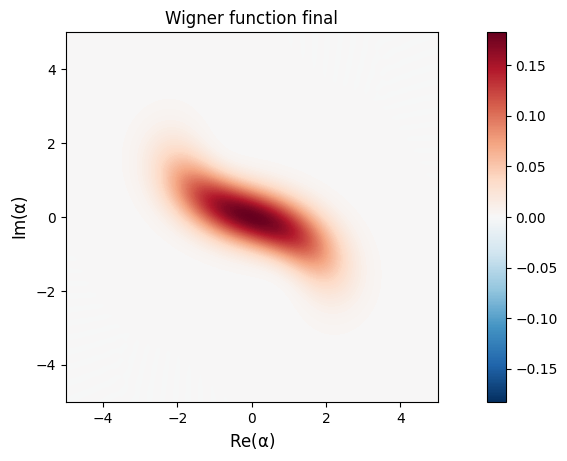

Time     | <X>        | <P>        | <n>        | <Parity>  
-----------------------------------------------------------------
0.0000   | 0.000000   | 0.000000   | 0.000000   | 1.000000
0.2019   | 0.000000   | 0.000000   | 0.255488   | 0.855654
0.4038   | 0.000000   | 0.000000   | 0.504935   | 0.721491
0.6058   | 0.000000   | 0.000000   | 0.655180   | 0.654148
0.8077   | 0.000000   | 0.000000   | 0.737920   | 0.617982
1.0096   | 0.000000   | 0.000000   | 0.782672   | 0.598274
1.2115   | 0.000000   | 0.000000   | 0.806879   | 0.587564
1.4134   | 0.000000   | 0.000000   | 0.819990   | 0.581756
1.6154   | 0.000000   | 0.000000   | 0.827096   | 0.578608
1.8173   | 0.000000   | 0.000000   | 0.830948   | 0.576902
2.0192   | 0.000000   | 0.000000   | 0.833035   | 0.575977
2.2211   | 0.000000   | 0.000000   | 0.834167   | 0.575475
2.4230   | 0.000000   | 0.000000   | 0.834780   | 0.575204
2.6249   | 0.000000   | 0.000000   | 0.835112   | 0.575057
2.8269   | 0.000000   | 0.000000   | 0.835293  

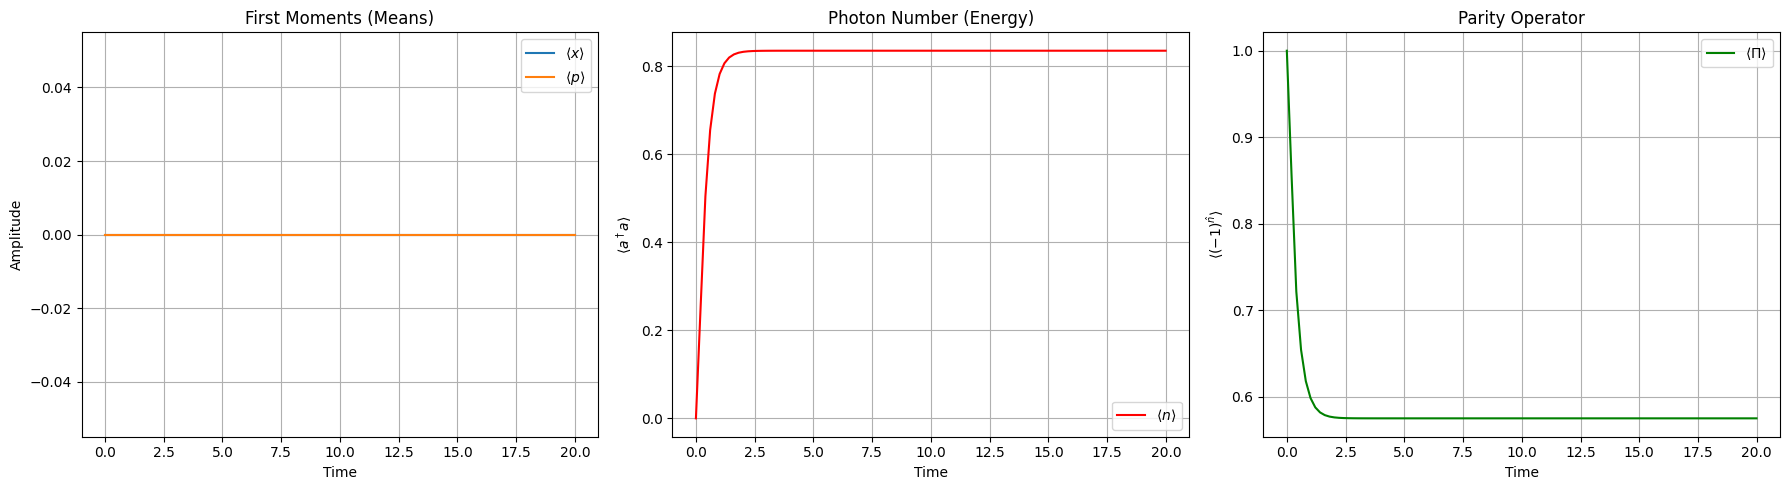

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# --- 1. Parameters ---
# Identical to your JAX setup
G = 3 + 3j    # Two-photon drive strength
delta = 1       # Detuning
U = 1         # Kerr nonlinearity
gamma = 10      # Single-photon loss rate

# Simulation parameters
N = 100            # Hilbert space cutoff (must be high enough to capture squeezing)
t_start = 0.0
t_end = 19.99
steps = 100       # Higher resolution than the Euler step
tlist = np.linspace(t_start, t_end, steps)

# --- 2. Operators ---
a = qt.destroy(N)
n_op = a.dag() * a
x_op = (a + a.dag()) / np.sqrt(2) # Position quadrature
p_op = 1j * (a.dag() - a) / np.sqrt(2) # Momentum quadrature

# Parity operator defined as exp(i * pi * n)
# Equivalently, it is a diagonal matrix with entries (-1)^n
parity_op = (1j * np.pi * n_op).expm() 

# --- 3. Hamiltonian Construction ---
# H_detuning = delta * a^dag * a
H_det = -delta * n_op

# H_kerr = (U/2) * a^dag^2 * a^2 (Standard Kerr form)
H_kerr = 0.5 * U * a.dag()**2 * a**2

# H_drive = G * a^dag^2 + G* * a^2 (Two-photon drive)
# Note: In some conventions, this might be i(G a^dag^2 - G* a^2).
# Based on your JAX summation, it implies a direct Hermitian addition:
H_drive = (G/2 * a.dag()**2) + (np.conj(G)/2 * a**2)

# Total Hamiltonian
# To simulate the "Only G term" case, set delta=0 and U=0 here.
H = H_drive + H_det + H_kerr

# --- 4. Dissipation ---
# Single photon loss: sqrt(gamma) * a
c_ops = [np.sqrt(gamma) * a]

# --- 5. Initial State ---
# Vacuum state
psi0 = (qt.coherent(N, 2) + qt.coherent(N, -2)).unit()
psi0 = qt.basis(N, 0)

print(np.pi*qt.wigner(psi0, 0, 0))

# --- 6. Solve Master Equation ---
result = qt.mesolve(H, psi0, tlist, c_ops, e_ops=[x_op, p_op, n_op, parity_op], options={"store_final_state":True})

# --- 7. Plotting & Verification ---
means_x = result.expect[0]
means_p = result.expect[1]
means_n = result.expect[2]
means_parity = result.expect[3]

fig, ax = qt.plot_wigner(result.final_state, xvec=np.linspace(-5,5,100), yvec=np.linspace(-5,5,100), colorbar=True, cmap='RdBu_r')


# Add plot customizations (optional)
ax.set_title("Wigner function final")
plt.show()

print(f"{'Time':<8} | {'<X>':<10} | {'<P>':<10} | {'<n>':<10} | {'<Parity>':<10}")
print("-" * 65)
for i in range(0, len(tlist), 1): # Print every 10th step
    print(f"{tlist[i]:.4f}   | {means_x[i]:.6f}   | {means_p[i]:.6f}   | {means_n[i]:.6f}   | {means_parity[i]:.6f}")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot Means
ax[0].plot(tlist, means_x, label=r'$\langle x \rangle$')
ax[0].plot(tlist, means_p, label=r'$\langle p \rangle$')
ax[0].set_title("First Moments (Means)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

# Plot Photon Number
ax[1].plot(tlist, means_n, label=r'$\langle n \rangle$', color='r')
ax[1].set_title("Photon Number (Energy)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel(r"$\langle a^\dagger a \rangle$")
ax[1].legend()
ax[1].grid(True)

# Plot Parity
ax[2].plot(tlist, means_parity, label=r'$\langle \Pi \rangle$', color='g')
ax[2].set_title("Parity Operator")
ax[2].set_xlabel("Time")
ax[2].set_ylabel(r"$\langle (-1)^{\hat{n}} \rangle$")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

[[1.]]


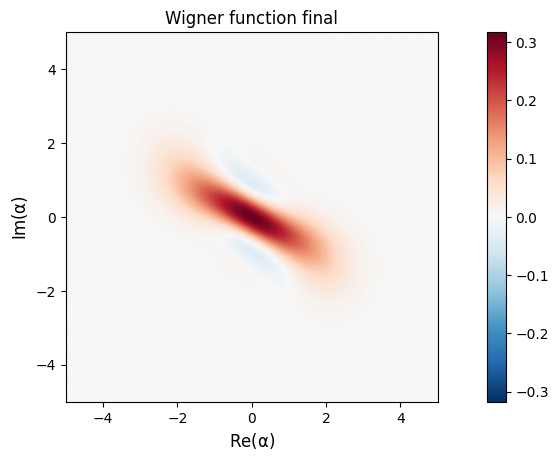

Time     | <X>        | <P>        | <n>        | <Parity>  
-----------------------------------------------------------------
0.0000   | 0.000000   | 0.000000   | 0.000000   | 1.000000
0.0025   | 0.000000   | 0.000000   | 0.000114   | 1.000000
0.0051   | 0.000000   | 0.000000   | 0.000457   | 1.000000
0.0076   | 0.000000   | 0.000000   | 0.001026   | 1.000000
0.0101   | 0.000000   | 0.000000   | 0.001819   | 1.000000
0.0126   | 0.000000   | 0.000000   | 0.002836   | 1.000000
0.0152   | 0.000000   | 0.000000   | 0.004075   | 1.000000
0.0177   | 0.000000   | 0.000000   | 0.005535   | 1.000000
0.0202   | 0.000000   | 0.000000   | 0.007215   | 1.000000
0.0227   | 0.000000   | 0.000000   | 0.009113   | 1.000000
0.0253   | 0.000000   | 0.000000   | 0.011229   | 1.000000
0.0278   | 0.000000   | 0.000000   | 0.013562   | 1.000000
0.0303   | 0.000000   | 0.000000   | 0.016110   | 1.000000
0.0328   | 0.000000   | 0.000000   | 0.018873   | 1.000000
0.0354   | 0.000000   | 0.000000   | 0.021849  

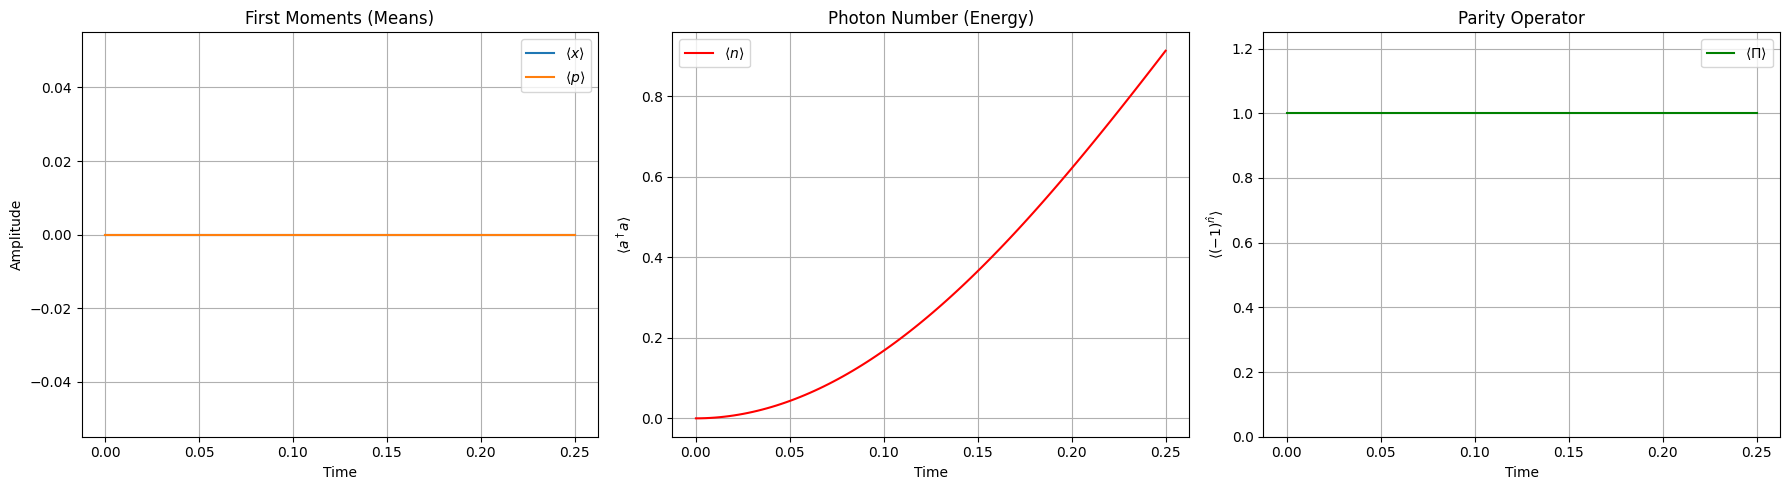

In [9]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# --- 1. Parameters ---
# Identical to your JAX setup
G = 3 + 3j    # Two-photon drive strength
delta = 0       # Detuning
U = 1         # Kerr nonlinearity
n = 1
gamma = 0      # Single-photon loss rate

# Simulation parameters
N = 100            # Hilbert space cutoff (must be high enough to capture squeezing)
t_start = 0.0
t_end = 0.25
steps = 100       # Higher resolution than the Euler step
tlist = np.linspace(t_start, t_end, steps)

# --- 2. Operators ---
a = qt.destroy(N)
n_op = a.dag() * a
x_op = (a + a.dag()) / np.sqrt(2) # Position quadrature
p_op = 1j * (a.dag() - a) / np.sqrt(2) # Momentum quadrature

# Parity operator defined as exp(i * pi * n)
# Equivalently, it is a diagonal matrix with entries (-1)^n
parity_op = (1j * np.pi * n_op).expm() 

# --- 3. Hamiltonian Construction ---
# H_detuning = delta * a^dag * a
H_det = -delta * n_op

# H_kerr = (U/2) * a^dag^2 * a^2 (Standard Kerr form)
H_kerr = 0.5 * U * a.dag()**2 * a**2

# H_drive = G * a^dag^2 + G* * a^2 (Two-photon drive)
# Note: In some conventions, this might be i(G a^dag^2 - G* a^2).
# Based on your JAX summation, it implies a direct Hermitian addition:
H_drive = (G/2 * a.dag()**2) + (np.conj(G)/2 * a**2)

# Total Hamiltonian
# To simulate the "Only G term" case, set delta=0 and U=0 here.
H = H_drive + H_det + H_kerr

# --- 4. Dissipation ---
# Single photon loss: sqrt(gamma) * a
c_ops = [np.sqrt(gamma) * a, np.sqrt(n) * a**2]

# --- 5. Initial State ---
# Vacuum state
psi0 = (qt.coherent(N, 2) + qt.coherent(N, -2)).unit()
psi0 = qt.basis(N, 0)

print(np.pi*qt.wigner(psi0, 0, 0))

# --- 6. Solve Master Equation ---
result = qt.mesolve(H, psi0, tlist, c_ops, e_ops=[x_op, p_op, n_op, parity_op], options={"store_final_state":True})

# --- 7. Plotting & Verification ---
means_x = result.expect[0]
means_p = result.expect[1]
means_n = result.expect[2]
means_parity = result.expect[3]

fig, ax = qt.plot_wigner(result.final_state, xvec=np.linspace(-5,5,100), yvec=np.linspace(-5,5,100), colorbar=True, cmap='RdBu_r')


# Add plot customizations (optional)
ax.set_title("Wigner function final")
plt.show()

print(f"{'Time':<8} | {'<X>':<10} | {'<P>':<10} | {'<n>':<10} | {'<Parity>':<10}")
print("-" * 65)
for i in range(0, len(tlist), 1): # Print every 10th step
    print(f"{tlist[i]:.4f}   | {means_x[i]:.6f}   | {means_p[i]:.6f}   | {means_n[i]:.6f}   | {means_parity[i]:.6f}")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot Means
ax[0].plot(tlist, means_x, label=r'$\langle x \rangle$')
ax[0].plot(tlist, means_p, label=r'$\langle p \rangle$')
ax[0].set_title("First Moments (Means)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

# Plot Photon Number
ax[1].plot(tlist, means_n, label=r'$\langle n \rangle$', color='r')
ax[1].set_title("Photon Number (Energy)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel(r"$\langle a^\dagger a \rangle$")
ax[1].legend()
ax[1].grid(True)

# Plot Parity
ax[2].plot(tlist, means_parity, label=r'$\langle \Pi \rangle$', color='g')
ax[2].set_title("Parity Operator")
ax[2].set_xlabel("Time")
ax[2].set_ylabel(r"$\langle (-1)^{\hat{n}} \rangle$")
ax[2].set_ylim([0,1.25])
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()